In [20]:
import pandas as pd 
import numpy as np

df = pd.read_csv('contohTwit.csv')

adr = df['profileImageUrl'][200][:-11] + ".jpg"

adr

'http://pbs.twimg.com/profile_images/1034446672116338688/v1bsxUio.jpg'

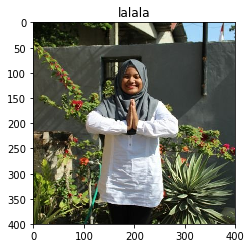

In [23]:
import cv2
import urllib
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

def showImage(img, im_name) :
    fig = plt.figure()
    ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax1.set_title(im_name)
    plt.imshow(img)


arr = None
with urllib.request.urlopen(adr) as url:
#     s = url.read()
    arr = np.asarray(bytearray(url.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

showImage(img, 'lalala')